# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab is idle and not moving regardless of conditions (e.g. changing lights, movement of other cars).

Two types of rewards are observed: a small positive reward (roughly between +1 to +3) while idle at a red light and a larger negative reward (roughly between -4 to -6) when idle at a green light. The ranges are due to some randomness in the reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Three flags in agent.py and how they change in the simulation:
- "learning" forces the driving agent to use Q-learning if set to "True".
- "alpha" defines the learning rate, which controls the influence of new versus prior information. A value of zero means no new information is learned. A value of 1 means only new information is learned. Default is 0.5.
- "epsilon" is the exploration factor that controls how often the agent chooses a random action rather than selecting the best action based on learned information.

In environment.py, the act() function is called to perform an action after confirming legality.

In simulator.py, render() renders the simulation in a GUI while render_text() renders the simulation in the terminal without the GUI.

In planner.py, next_waypoint() considers East-West direction prior to considering North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The "total bad actions" curve in the "frequency of bad actions" plot shows the driving agent is making bad decisions almost half the time, between 0.4 to 0.5 in frequency. The red curves show about 20% of the bad actions result in accidents.

The plot of reliability show values between 0% and 30%. Given that the agent drives randomly, it makes sense to see a low reliabilty with some variability. It's not surprising to see a 0% reliability or a low value of 20% or even 30% when it gets randomly luckier.

As one would expect, the rewards per action plot is negative. Comparing three plots, the higher the frequency of bad actions, the more negative the reward per action, and the lower the reliability. 

As the number of trials increases, the results show a slight improvement that may not be significant.

The smartcab would definitely not be considered safe or reliable. It makes a bad decision almost half the time. Safety is a problem, given accidents occur about 20% of the time. The poor reliability shows it does not arrive on time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

"waypoint" is relevant for efficiency because it provides the direction the smartcab should take to reach the destination.

The intersection data for the "light" color and the intended direction of cars on the "left" and "oncoming" cars are revelant for safety so the smartcab can learn to stop at a red light as well as learn when it is safe to proceed while avoiding collisions. The intersection data for cars on the "right" is not relevant. Whatever that car is doing has no influence on the driving agent since a red light offers protection against any action the right car might take. Excluding it reduces the state space by a factor of 4.

"deadline" is not relevant because the ideal smartcab should already be operating as safely and efficiently as it can based on sensor inputs and waypoint. "deadline" would not be relevant unless you are willing to trade-off safety to meet a deadline that otherwise would have been missed (e.g. running a red light). This is would require adjusting the rewards/penalties. "deadline" can also take on a range of values that would increase the state space significantly unless divided into discrete buckets.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Four features are considered relevant. "Waypoint" can take three states (forward, left, right). "Light" can take two states (red, green). "Oncoming" and "left" can each take four states (None, forward, left, right). This makes a total of 96 potential states (3 x 2 x 4 x 4 = 96). Because we have four available actions for each state, the the Q-table will have almost 400 values (96 x 4 = 384). We want the agent to learn a value for each of the 400 Q-values. Assuming a 20 time step deadline for each trial, we would need at a minimum 20 training trials to reach 400 updates to the Q-table. Depending on what states occur in the simulation as well as their frequency, it could take longer for the agent to see every state-action pair, even if operating in pure exploration mode with random actions. In general, I think the agent should be able to learn a policy for 96 states within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

We now see some learning occuring based on the improved performance across training trials. The frequency of bad actions declines from 0.41 to 0.13. In particular, major violations drop significantly over trials as the agent learns to consider the penalties. The average reward improves from -6 to -1. Reliability is generally better, scoring between 30-50%. However, just as for the basic driving agent, the rating in the testing trials score poorly with F for both safety and reliabilty. Major violations with accidents still occur and the agent still has problems arrive on time. In fact, the reliabilty during the 20 training trials does not seem to improve much.

As shown in the parameter plot, the driving agent required 20 trials before testing since it takes 20 steps to decrease the exploration factor (epsilon) in 0.05 increments before reaching the tolerance of 0.05 to begin testing. Also, the minimum number of training trials happens to be set to 20.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

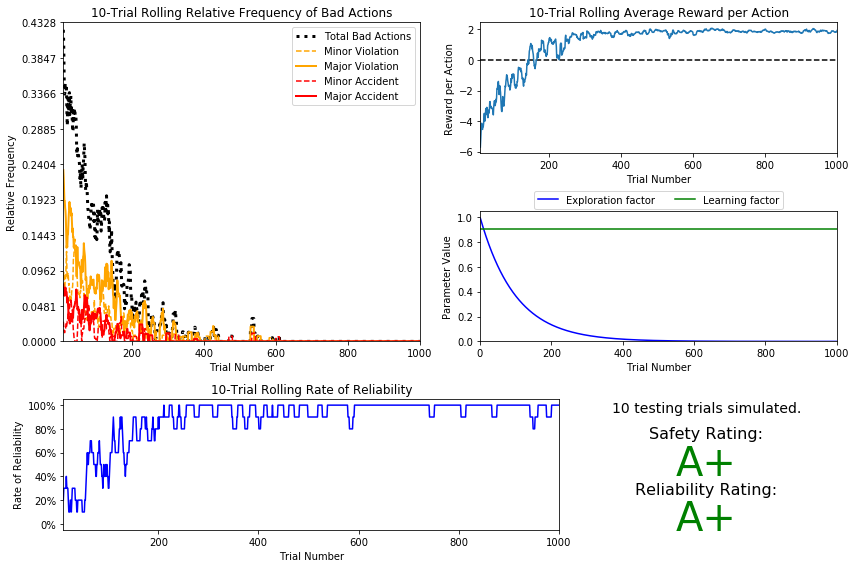

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

epsilon = a^t (where a = 0.99) was chosen for the decaying function because the adjustable "a" constant provides more control over the exploration decay characteristic compared to a function such as epsilon = 1/t^2, which has a fixed exploration decay. Setting a higher "a" such as a = 0.99 extended the amount of exploration so the Q-learner could get a chance to learn values for more actions in the Q-table and encounter more states.

The epsilon tolerance parameter is set based on the desired duration of training using the "t" variable. After the exploration phase, it helped to give the agent more training time to act on and refine what it was learning.

About 600-1000 training trials provided enough training for violations to drop and reliabilty to increases. Stretching out the training time helps the agent see more states and learn optimal policies.

A high learning rate of 0.9 was chosen to give more weight to learning from new information while reducing total training time. Based on the simulation parameters, the rewards for correct actions and penalties for violations and accidents are "mostly" deterministic, with a small amount of randomness thrown in.

Overall, this Q-learner was significant better than the previous version. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**Optimal policy**

If light is red
- If waypoint directs right and there are no cars on the left going forward
    - Follow waypoint (right).
- Otherwise, idle.

If light is green
- If waypoint directs left and there are oncoming cars going forward or right
    - Idle.
- Otherwise, follow waypoint.


**Optimal policy in code**

In [6]:
def optimal_policy(waypoint, light, left, oncoming):
    # Function contains logic for optimal policy
    # Inputs: Relevant features (waypoint, light, left, oncoming)
    # Outputs: Action under optimal policy
    
    if light == "red":
        if (waypoint == "right") & (left != "forward"):
                action = waypoint
        else:
            action = "None"
    
    if light == "green":
        if (waypoint == "left") & ((oncoming == "forward") | (oncoming == "right")):
            action = "None"
        else:
            action = waypoint
        
    return action            

**I modified the simulator() function to output the Q-table into CSV format for analysis in this notebook.**

In [10]:
import pandas as pd
import numpy as np

# Read Q-table CSV into dataframe
qtable_csv_filename = "logs/sim_improved-qtable.csv"
q_df = pd.read_csv(qtable_csv_filename)

# Clean up formatting
for col in ['WAYPOINT', 'LIGHT', 'LEFT', 'ONCOMING']:
    q_df[col] = [x.replace("'","") for x in q_df[col]]

# Add column for Qmax
q_df["Qmax"] = q_df[['forward','None','right','left']].max(axis=1)

# Add columns for action based on Qmax. Also find action under optimal policy.
actions = ['forward','None','right','left']

list_Qmax_action = []
list_optimal_action = []
list_policy = []
list_result = []
list_deviation = []

for idx, row in q_df.iterrows():
    Qmax_action = [action for action in actions if row[action] == max(row[actions])]
    if isinstance(Qmax_action, list) & (len(Qmax_action)==1):
        Qmax_action = Qmax_action[0]  # Single actions are strings. Multiple actions are lists.
    list_Qmax_action.append(Qmax_action)
    
    optimal_action = optimal_policy(row['WAYPOINT'], row['LIGHT'], row['LEFT'], row['ONCOMING'])
    list_optimal_action.append(optimal_action)
    
    # Add column to indicate:
    # 1. Inconclusive: More than one action with for Qmax
    # 2. Agree: Qmax action agrees optimal action
    # 3. Disagree: Qmax action disagrees with optimal action
    
    if isinstance(Qmax_action, list) & (len(Qmax_action) > 1):
        policy = "inconclusive"
        deviation = "inconclusive"
        result = 0
    else:
        if Qmax_action == optimal_action:
            policy = "agree"
            result = 1
        else:
            policy = "disagree"
            result = -1
            
        # Add column to indicate whether Q-learner deviated from waypoint, excluding stops.
        if Qmax_action == "None":
            deviation = "stop"
        else:  # Not a stop
            if Qmax_action != row['WAYPOINT']:
                deviation = "deviation"  # Deviation from waypoint
            else:
                deviation = "following"  # Following waypoint
    
    list_policy.append(policy)
    list_result.append(result)
    list_deviation.append(deviation)
    
q_df['Qmax_action'] = list_Qmax_action
q_df['optimal_action'] = list_optimal_action
q_df['policy'] = list_policy
q_df['deviation'] = list_deviation

# Summarize Q-table results
cnt_agree = sum(q_df['policy'] == "agree")
cnt_disagree = sum(q_df['policy'] == "disagree")
cnt_inconclusive = sum(q_df['policy'] == "inconclusive")
cnt_deviation = sum(q_df['deviation'] == "deviation")
cnt_following = sum(q_df['deviation'] == "following")
cnt_stops = sum(q_df['deviation'] == "stop")

pct_agree = 100.0 * cnt_agree / len(q_df)
pct_disagree = 100.0 * cnt_disagree / len(q_df)
pct_inconclusive = 100.0 * cnt_inconclusive / len(q_df)
pct_deviation = 100.0 * cnt_deviation / (cnt_deviation + cnt_following)

print "\nMETRICS\n"
print "Q-learner state and optimal policy agree:     {}  ({:.1f}%)".format(cnt_agree, pct_agree)
print "Q-learner state and optimal policy disagree:  {}  ({:.1f}%)".format(cnt_disagree, pct_disagree)
print "Q-learner state has multiple Qmax actions:     {}  ({:.1f}%)".format(cnt_inconclusive, pct_inconclusive)
print ""
print "Q-learner state deviates from waypoint in {} states (follows in {}, stops in {}).".format(\
    cnt_deviation, cnt_following, cnt_stops)


METRICS

Q-learner state and optimal policy agree:     86  (89.6%)
Q-learner state and optimal policy disagree:  10  (10.4%)
Q-learner state has multiple Qmax actions:     0  (0.0%)

Q-learner state deviates from waypoint in 10 states (follows in 50, stops in 36).


**Where smartcab did not learn the optimal policy**

The Q-learner disagrees with the optimal policy in the 10 states shown in the dataframe below. Two of these states call for a right turn on a green light. The optimal policy is clearly to make the right turn, as allowed by the green light. In these two states, the Q-value for the right turn action is still at the initial value of 0, so the agent has not yet explored the correct action to reward it properly. Therefore, the Qmax for both states is stuck at a very low value of 0.12 and 0.23, corresponding to suboptimal actions.

The other eight states call for a left turn on green, where the oncoming car is either driving forward or turning right. The optimal policy based on real world driving is to stop, because the oncoming car also has a green light and right of way to proceed forward or right. Making the left turn results in a minor accident. However, rather than stopping, the agent deviates from the waypoint by going forward or making a right based on a Qmax that is fairly low. It doesn't take the "None" action, which has a negative value around -5. The simulation considers stopping on a green light to be a "valid but incorrect" action (reward=1) rather than a right action such as stopping for a red light (reward=2). Personally, I believe stopping on green should be the correct action (reward=2) when the oncoming car is heading right or forward. This adjustment to the rewards/penalities would make the simulation more consistent with the real world.  

In [13]:
# List states where Q-learner disagrees with optimal policy.
q_df[q_df["policy"]=="disagree"].sort_values("WAYPOINT", ascending=False)

WAYPOINT  LIGHT     LEFT ONCOMING  forward  None  right   left  Qmax  \
12    right  green    right     None     0.12 -5.78   0.00   0.11  0.12   
57    right  green    right     left     0.00  0.00   0.00   0.23  0.23   
17     left  green     left  forward     1.68 -4.23  -0.04 -18.58  1.68   
22     left  green    right    right     0.10  0.00  -0.17 -17.69  0.10   
41     left  green  forward    right     1.53 -5.71  -0.58   0.00  1.53   
56     left  green     None  forward    -0.51 -5.73   1.20 -20.79  1.20   
58     left  green    right  forward     0.00 -5.80   1.60 -18.38  1.60   
75     left  green     left    right     0.23  0.00   0.36   0.00  0.36   
88     left  green  forward  forward     0.98 -4.91  -0.24 -18.10  0.98   
93     left  green     None    right    -0.04 -4.53   1.61 -19.25  1.61   

   Qmax_action optimal_action    policy  deviation  
12     forward          right  disagree  deviation  
57        left          right  disagree  deviation  
17     forward           None  disagree  deviation  
22     forward           None  disagree  deviation  
41     forward           None  disagree  deviation  
56       right           None  disagree  deviation  
58       right           None  disagree  deviation  
75       right           None  disagree  deviation  
88     forward           None  disagree  deviation  
93       right           None  disagree  deviation

**Examples of following the optimal policy**

The dataframe below shows three states where the learned action (based on Qmax) agrees with the optimal policy.
1. Waypoint calls for a left turn. The light is green. The optimal policy should be to proceed left as long as the oncoming car is not turning right or moving forward. Qmax value in the Q-table is 2.34 based on following the waypoint with a left turn.

2. Waypoint calls for a right turn. The light is red. Optimal policy says to turn right if car to the left is not going forward — there is no car on the left. Highest Q-value is 2.76 for a right turn.

3. Waypoint calls for a right turn. Light is green. Optimal policy is a green light allows you to turn right. The highest Q-value is 2.00 for right. The other actions are still at the initial value of 0, meaning the first action taken in this state happened to be the right one. Due to the high Q-value of 2, the learner chose right. If the agent had randomly explored the other actions, they would likely receive a low or negative Q-value such that the learner would choose a right turn in future encounters of this state.

In [15]:
q_df[q_df["policy"]=="agree"].head(3)

WAYPOINT  LIGHT     LEFT ONCOMING  forward  None  right  left  Qmax  \
0     left  green  forward     left    -0.41 -5.21   0.43  2.34  2.34   
1    right    red     None  forward    -9.53  0.38   2.76 -9.57  2.76   
2    right  green  forward    right     0.00  0.00   2.00  0.00  2.00   

  Qmax_action optimal_action policy  deviation  
0        left           left  agree  following  
1       right          right  agree  following  
2       right          right  agree  following

**Q-Table, sorted by "policy" (whether the Qmax action agreed with the optimal action)**

In [16]:
# Show the entire Q-table
pd.options.display.max_rows = 100  # Allow display of more rows in jupyter
q_df.sort_values(by="policy", ascending=False)

WAYPOINT  LIGHT     LEFT ONCOMING  forward  None  right   left  Qmax  \
57    right  green    right     left     0.00  0.00   0.00   0.23  0.23   
56     left  green     None  forward    -0.51 -5.73   1.20 -20.79  1.20   
22     left  green    right    right     0.10  0.00  -0.17 -17.69  0.10   
12    right  green    right     None     0.12 -5.78   0.00   0.11  0.12   
41     left  green  forward    right     1.53 -5.71  -0.58   0.00  1.53   
58     left  green    right  forward     0.00 -5.80   1.60 -18.38  1.60   
88     left  green  forward  forward     0.98 -4.91  -0.24 -18.10  0.98   
17     left  green     left  forward     1.68 -4.23  -0.04 -18.58  1.68   
75     left  green     left    right     0.23  0.00   0.36   0.00  0.36   
93     left  green     None    right    -0.04 -4.53   1.61 -19.25  1.61   
67    right  green     None     None     0.67 -4.44   2.49   0.68  2.49   
63    right    red  forward  forward   -36.06 -0.47 -19.77 -39.48 -0.47   
68  forward  green  forward     left     1.36 -4.79   0.26   0.86  1.36   
69    right  green     left  forward     0.80  0.00   2.19 -17.42  2.19   
66    right    red  forward     left   -40.07  0.40 -18.69 -36.62  0.40   
65  forward  green     None    right     1.61 -4.42   0.58 -19.20  1.61   
64  forward    red    right     None   -10.36  2.70   0.28 -10.23  2.70   
0      left  green  forward     left    -0.41 -5.21   0.43   2.34  2.34   
60     left  green     None     None    -0.10 -4.38   0.69   2.76  2.76   
62  forward  green     left  forward     1.25  0.00   0.00 -18.41  1.25   
61  forward    red     left  forward   -10.80  2.75   0.05  -9.13  2.75   
71     left  green     left     None     0.27 -4.71   0.45   2.41  2.41   
59     left    red     None    right    -9.64  2.09  -0.21 -39.96  2.09   
55  forward    red     left     None    -9.71  1.96   0.01   0.00  1.96   
54  forward  green  forward     None     2.23 -5.83   0.29   0.81  2.23   
53  forward    red     left    right     0.00  2.62   0.20   0.00  2.62   
52  forward    red  forward    right   -36.53  2.09 -17.26   0.00  2.09   
70     left    red  forward     left   -35.27  2.55 -19.65 -36.32  2.55   
74     left    red    right  forward   -10.25  1.64  -0.17  -8.30  1.64   
72  forward  green     left     left     1.74 -5.68  -0.30   0.07  1.74   
84    right  green     None     left     0.36 -5.17   2.57  -0.16  2.57   
94    right    red    right     None   -40.20  0.63   2.43  -8.57  2.43   
92    right    red    right    right     0.00 -0.07   2.35   0.00  2.35   
91     left    red     None  forward   -12.69  2.44   0.19 -10.20  2.44   
90  forward    red  forward     None   -39.84  1.74 -20.68 -40.41  1.74   
89    right  green     None  forward     0.23 -5.23   1.37 -18.43  1.37   
87    right    red  forward    right     0.00  0.65   0.00   0.00  0.65   
86     left  green    right     None     0.18 -5.13  -0.28   2.29  2.29   
85  forward  green    right     left     2.29  0.00   0.00   0.52  2.29   
83     left  green  forward     None     0.28 -5.46   0.04   1.53  1.53   
73     left  green     None     left     0.51 -5.52   0.63   2.34  2.34   
82    right    red  forward     None   -40.42  0.14 -20.41 -39.53  0.14   
81    right  green    right    right     0.00  0.00   2.02   0.00  2.02   
80     left    red     None     left    -9.12  2.26  -0.02 -10.61  2.26   
79    right    red     None     None   -10.18  0.02   1.13 -36.13  1.13   
78     left    red  forward  forward   -36.68  2.62 -18.33   0.00  2.62   
77     left    red     left    right    -8.79  2.44  -0.01   0.00  2.44   
76    right    red     left     left     0.00  0.95   1.73 -37.71  1.73   
50  forward  green     left    right     2.85 -5.24   0.00   0.00  2.85   
51    right  green  forward  forward     0.09 -5.15   2.85   0.00  2.85   
48  forward  green  forward  forward     1.91  0.00   0.00 -20.56  1.91   
49    right  green     left     None    -0.07 -5.56   2.25   0.00  2.25   
25     left    red  forward 

**Potential reduction in size of state space using domain knowledge**

One of the features I deemed irrelevant was intersection data about the right car based on knowledge that the red traffic light would ensure safety from any action of the right car. This reduces the size of the state space by 4x. Taking this approach further and utilizing domain knowledge, we know information about the left or oncoming car is only conditionally relevant. Under some circumstances, it doesn't matter what those car do, and removing them can further reduce the size of the state space. This can allow reduced training time or extended training.

For example, you can ignore the left car when the waypoint calls for a left on green or a right on red. This condenses 16 states into 4. You can also ignore both the left and oncoming cars when the waypoint calls for forward on green or either left or forward on red. This condenses 16 states into one.

Perhaps there is a more automated way to reduce the size of state space without prior domain knowledge. For example, rather than knowing apriori that the states of the left and oncoming cars don't matter when going forward on a green, we could see that the action corresponding to the Qmax of all possible states of the left and oncoming cars result in the same action (forward). So perhaps those features can be ignored.

Rather than attempting to hard-code any conditional reductions of the state space using domain knowledge, I focused on using reinforcement learning to arrive at the optimal policy.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The smartcab can plot out a optimal route in advance using the Manhattan distance. Future waypoints can be known ahead of time. However, the smartcab cannot sense the intended direction of other cars beyond the current time step. Also, the smartcab does not know how traffic lights will change in the future. These factors affect the calculation of future rewards. Furthermore, the additional incentive to reach the goal affects the Q-values and interferes with learning to drive through finding the optimal policy for each state.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.